In [2]:
#importing required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from library.sb_utils import save_file

In [3]:
#Loading the Cleaned file of our movie data-set
movies_revs = pd.read_csv(r"C:\Users\anshu\OneDrive\Documents\GitHub\Capstone 2_IMDB_Reviews\tmdb_clean.csv")

In [4]:
movies_revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9981 non-null   int64  
 1   title              9981 non-null   object 
 2   adult              9981 non-null   bool   
 3   genres             9981 non-null   object 
 4   original_language  9981 non-null   object 
 5   popularity         9981 non-null   float64
 6   release_date       9981 non-null   object 
 7   runtime            9981 non-null   int64  
 8   vote_average       9981 non-null   float64
 9   vote_count         9981 non-null   int64  
 10  actors             9981 non-null   object 
 11  director           9981 non-null   object 
 12  keywords           9981 non-null   object 
 13  release_year       9981 non-null   int64  
 14  num_genres         9981 non-null   int64  
 15  main_genre         9940 non-null   object 
 16  num_actors         9981 

In [8]:
movies_revs.head(10)

,id,title,adult,genres,original_language,popularity,release_date,runtime,vote_average,vote_count,actors,director,keywords,release_year,num_genres,main_genre,num_actors,main_actor
0,572802,Aquaman and the Lost Kingdom,False,"['Action', 'Adventure', 'Fantasy']",en,5841.384,2023-12-20,124,7.013,1156,"['Jason Momoa', 'Patrick Wilson', 'Yahya Abdul...",['James Wan'],"['superhero', 'secret society', 'half-brother'...",2023,3,Action,4,Jason Momoa
1,787699,Wonka,False,"['Comedy', 'Family', 'Fantasy']",en,2333.391,2023-12-06,117,7.200,1660,"['Timothée Chalamet', 'Calah Lane', 'Keegan-Mi...",['Paul King'],"['chocolate', 'musical', 'prequel', 'duringcre...",2023,3,Comedy,4,Timothée Chalamet
2,1022796,Wish,False,"['Animation', 'Family', 'Fantasy', 'Adventure']",en,1662.711,2023-11-13,95,6.638,538,"['Ariana DeBose', 'Chris Pine', 'Alan Tudyk', ...",['Chris Buck'],"['friendship', 'musical', 'computer animation'...",2023,4,Animation,4,Ariana DeBose
3,940551,Migration,False,"['Animation', 'Adventure', 'Comedy', 'Family',...",en,1486.310,2023-12-06,83,7.830,390,"['Kumail Nanjiani', 'Elizabeth Banks', 'Caspar...",['Benjamin Renner'],"['duck', 'migration', 'flight', 'anthropomorph...",2023,5,Animation,4,Kumail Nanjiani
4,609681,The Marvels,False,"['Science Fiction', 'Adventure', 'Action']",en,1397.918,2023-11-08,105,6.415,1328,"['Brie Larson', 'Teyonah Parris', 'Iman Vellan...",['Nia DaCosta'],"['hero', 'superhero', 'space travel', 'based o...",2023,3,Science Fiction,4,Brie Larson
5,1212073,Sixty Minutes,False,"['Action', 'Drama']",de,1028.278,2024-01-19,89,6.912,170,"['Emilio Sakraya', 'Dennis Mojen', 'Marie Mour...",['Oliver Kienle'],[],2024,2,Action,4,Emilio Sakraya
6,965571,Patriots Time,False,"['Action', 'War']",ru,830.989,2022-04-28,101,9.700,16,"['Daniyar Alshinov', 'Sanurzhan Suleymenov', '...",['Serikbol Utepbergenov'],[],2022,2,Action,4,Daniyar Alshinov
7,1058694,Radical,False,['Drama'],en,774.377,2023-10-19,127,8.626,139,"['Eugenio Derbez', 'Daniel Haddad', 'Jennifer ...",['Christopher Zalla'],"['usa–mexico border', 'teachers and students',...",2023,1,Drama,4,Eugenio Derbez
8,799155,Attack,False,"['Action', 'Science Fiction', 'Thriller']",hi,751.443,2022-04-01,123,7.412,85,"['John Abraham', 'Serena Walia', 'Rakul Preet ...",['Lakshya Raj Anand'],"['parliament', 'super soldier', 'soldier', 'in...",2022,3,Action,4,John Abraham
9,955916,Lift,False,"['Action', 'Comedy', 'Crime', 'Drama']",en,740.964,2024-01-10,106,6.499,616,"['Kevin Hart', 'Gugu Mbatha-Raw', 'Sam Worthin...",['F. Gary Gray'],"['gold', 'gang of thieves', 'heist', 'airplane...",2024,4,Action,4,Kevin Hart


In [10]:
#Loading the actor_summary.csv file
actor_summary = pd.read_csv(r"C:\Users\anshu\OneDrive\Documents\GitHub\Capstone 2_IMDB_Reviews\actor_summary.csv")

In [12]:
actor_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actor           1732 non-null   object 
 1   avg_rating      1732 non-null   float64
 2   avg_popularity  1732 non-null   float64
 3   movie_count     1732 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 54.3+ KB


In [14]:
actor_summary.head()

,actor,avg_rating,avg_popularity,movie_count
0,50 Cent,5.802286,55.983000,7
1,Aamir Khan,7.383400,22.448400,5
2,Aaron Eckhart,6.317842,51.301474,19
3,Aaron Paul,6.647857,18.059143,7
4,Aaron Taylor-Johnson,5.753214,30.162143,14


In [16]:
#Converting release_date to datetime
movies_revs['release_date'] = pd.to_datetime(movies_revs['release_date'], errors='coerce')
movies_revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9981 non-null   int64         
 1   title              9981 non-null   object        
 2   adult              9981 non-null   bool          
 3   genres             9981 non-null   object        
 4   original_language  9981 non-null   object        
 5   popularity         9981 non-null   float64       
 6   release_date       9981 non-null   datetime64[ns]
 7   runtime            9981 non-null   int64         
 8   vote_average       9981 non-null   float64       
 9   vote_count         9981 non-null   int64         
 10  actors             9981 non-null   object        
 11  director           9981 non-null   object        
 12  keywords           9981 non-null   object        
 13  release_year       9981 non-null   int64         
 14  num_genr

In [18]:
movies_revs.describe(include= 'all')

,id,title,adult,genres,original_language,popularity,release_date,runtime,vote_average,vote_count,actors,director,keywords,release_year,num_genres,main_genre,num_actors,main_actor
count,9.981000e+03,9981,9981,9981,9981,9981.000000,9981,9981.000000,9981.000000,9981.000000,9981,9981,9981,9981.000000,9981.000000,9940,9981.000000,9930
unique,NaN,9467,1,2288,53,NaN,NaN,NaN,NaN,NaN,9584,4855,8485,NaN,NaN,19,NaN,4553
top,NaN,Porno,False,['Drama'],en,NaN,NaN,NaN,NaN,NaN,[],[],[],NaN,NaN,Drama,NaN,Nicolas Cage
freq,NaN,5,9981,529,7482,NaN,NaN,NaN,NaN,NaN,51,41,975,NaN,NaN,1912,NaN,62
mean,3.093662e+05,NaN,NaN,NaN,NaN,29.631342,2007-05-02 12:17:57.727682816,101.753331,6.386695,1653.566576,NaN,NaN,NaN,2006.804729,2.631700,NaN,3.953111,NaN
min,5.000000e+00,NaN,NaN,NaN,NaN,12.674000,1902-04-17 00:00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,1902.000000,0.000000,NaN,0.000000,NaN
25%,1.131600e+04,NaN,NaN,NaN,NaN,15.125000,1999-10-06 00:00:00,91.000000,5.974000,168.000000,NaN,NaN,NaN,1999.000000,2.000000,NaN,4.000000,NaN
50%,9.693600e+04,NaN,NaN,NaN,NaN,19.194000,2012-06-23 00:00:00,101.000000,6.574000,576.000000,NaN,NaN,NaN,2012.000000,3.000000,NaN,4.000000,NaN
75%,5.566780e+05,NaN,NaN,NaN,NaN,28.301000,2020-02-27 00:00:00,115.000000,7.145000,1707.000000,NaN,NaN,NaN,2020.000000,3.000000,NaN,4.000000,NaN
max,1.234946e+06,NaN,NaN,NaN,NaN,5841.384000,2031-12-18 00:00:00,400.000000,10.000000,35168.000000,NaN,NaN,NaN,2031.000000,7.000000,NaN,4.000000,NaN


In [20]:
#Quick check for nulls
movies_revs.isnull().sum()

id                    0
title                 0
adult                 0
genres                0
original_language     0
popularity            0
release_date          0
runtime               0
vote_average          0
vote_count            0
actors                0
director              0
keywords              0
release_year          0
num_genres            0
main_genre           41
num_actors            0
main_actor           51
dtype: int64

In [22]:
#Checking for duplicates 
movies_revs.duplicated().sum()

173

In [44]:
#Previewing the duplicated data and dropping them
movies_revs[movies_revs.duplicated(keep=False)].sort_values(by='title')



AttributeError: 'NoneType' object has no attribute 'duplicated'

In [40]:
movies_revs.drop_duplicates(inplace = True)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [34]:
movies_revs = movies_revs.duplicated()

AttributeError: 'NoneType' object has no attribute 'duplicated'

In [200]:
#Starting with Univariate Analysis
movies_revs.select_dtypes(include ='number').columns

Index(['id', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'num_genres', 'num_actors'],
      dtype='object')

In [202]:
#Using the describe() function on numeric columns 
movies_revs[['popularity','runtime','vote_average','vote_count','release_year','num_genres', 'num_actors']].describe()

,popularity,runtime,vote_average,vote_count,release_year,num_genres,num_actors
count,9808.000000,9808.000000,9808.000000,9808.000000,9808.000000,9808.000000,9808.000000
mean,29.465235,101.802202,6.387273,1642.683931,2006.733585,2.629588,3.953915
std,77.958201,27.838553,1.352642,3001.293190,16.992314,1.098647,0.366482
min,12.674000,0.000000,0.000000,0.000000,1902.000000,0.000000,0.000000
25%,15.074750,91.000000,5.972000,168.000000,1999.000000,2.000000,4.000000
50%,19.035500,101.000000,6.570000,571.000000,2012.000000,3.000000,4.000000
75%,28.072750,115.000000,7.145000,1691.500000,2020.000000,3.000000,4.000000
max,5841.384000,400.000000,10.000000,35168.000000,2031.000000,7.000000,4.000000


In [204]:
#Some movies have 0 runtime which is invalid
movies_revs[movies_revs['runtime'] == 0]

,id,title,adult,genres,original_language,popularity,release_date,runtime,vote_average,vote_count,actors,director,keywords,release_year,num_genres,main_genre,num_actors,main_actor
67,101251,El Padrino II: Border Intrusion,False,['Crime'],en,221.777,2008-01-01,0,6.250,4,"['Damian Chapa', 'Jeff McCredie', 'Konstantine...",['Damian Chapa'],[],2008,1,Crime,4,Damian Chapa
109,823464,Godzilla x Kong: The New Empire,False,"['Action', 'Science Fiction', 'Adventure']",en,160.163,2024-03-27,0,0.000,0,"['Rebecca Hall', 'Brian Tyree Henry', 'Dan Ste...",['Adam Wingard'],"['giant monster', 'sequel', 'dinosaur', 'kaiju...",2024,3,Action,4,Rebecca Hall
133,1022789,Inside Out 2,False,"['Animation', 'Family', 'Comedy', 'Drama', 'Ad...",en,138.669,2024-06-13,0,0.000,0,"['Amy Poehler', 'Phyllis Smith', 'Lewis Black'...",['Kelsey Mann'],"['sequel', 'computer animation', 'teenage girl...",2024,6,Animation,4,Amy Poehler
151,659495,Good Mother 2,False,['Romance'],ko,127.396,2018-10-19,0,0.000,0,"['Hae Il', 'Jang-mi', 'Ha Jin', 'Go Dae-hyeon']",['Kwak Young-geun'],['softcore'],2018,1,Romance,4,Hae Il
196,832074,Tourist,False,['Action'],ru,112.798,2021-05-19,0,6.536,28,"['Aleksei Shevchenkov', 'Evgeny Terskikh', 'Ge...",['Andrey Batov'],[],2021,1,Action,4,Aleksei Shevchenkov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,1170946,Section 108,False,[],hi,12.974,2024-02-02,0,0.000,0,"['Nawazuddin Siddiqui', 'Regina Cassandra', 'A...",['Rashik Khan'],[],2024,0,Drama,3,Nawazuddin Siddiqui
9750,1053544,The Abyss,False,"['Thriller', 'Drama', 'Action']",sv,12.858,2023-09-15,0,5.700,3,"['Tuva Novotny', 'Kardo Razzazi', 'Peter Franz...",['Richard Holm'],['iron mine'],2023,3,Thriller,4,Tuva Novotny
9788,1219535,Cover Story - 20 anni di Vanity Fair,False,['Documentary'],it,12.825,2024-01-29,0,0.000,0,"['Monica Bellucci', 'Miriam Leone', 'Kasia Smu...",['Cosimo Alemà'],[],2024,1,Documentary,4,Monica Bellucci
9800,1230186,Grounded II: Making The Last of Us Part II,False,['Documentary'],en,12.814,2024-02-02,0,0.000,0,"['Troy Baker', 'Ashley Johnson', 'Halley Wegry...",[],"['video game', 'making of', 'video game develo...",2024,1,Documentary,3,Troy Baker


In [206]:
runtime_medians = movies_revs[movies_revs['runtime'] != 0]['runtime'].median()
movies_revs['runtime'] = movies_revs['runtime'].replace(0, runtime_medians)

In [208]:
(movies_revs['runtime'] == 0).sum()

0

In [210]:
#Since there are movies with no voting averages, instead of filling them with median which could be misleading for our analysis, we filter the rows.
(movies_revs['vote_average'] == 0.000).sum()

242

In [212]:
movies_cleaned = movies_revs[movies_revs['vote_average'] > 0 ]
(movies_cleaned['vote_average'] == 0.000).sum()

0

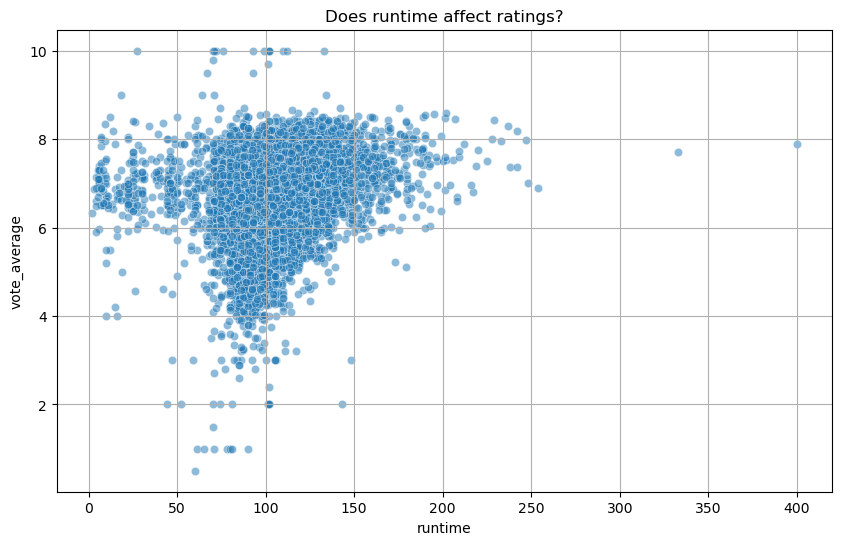

In [214]:
#Now since we replaced the '0's with median values for runtime and filtered vote_averages, lets plot a scatterplot to see if 'runtime'has any effect on 'voting average'.

plt.figure(figsize = (10,6))
sns.scatterplot(data=movies_cleaned, x ='runtime', y='vote_average', alpha =0.5)
plt.title('Does runtime affect ratings?')
plt.xlabel('runtime')
plt.ylabel('vote_average')
plt.grid(True)
plt.show()

In [216]:
#Seems like 'runtime' does not have a direct impact on rating. 
actor_summary.head()


,actor,avg_rating,avg_popularity,movie_count
0,50 Cent,5.802286,55.983000,7
1,Aamir Khan,7.383400,22.448400,5
2,Aaron Eckhart,6.317842,51.301474,19
3,Aaron Paul,6.647857,18.059143,7
4,Aaron Taylor-Johnson,5.753214,30.162143,14


In [218]:
#Creating a top movies data frame which we will use to merge with actor_summary to have a deeper look.
top_rating = movies_cleaned['vote_average'].max()
top_movies = movies_cleaned[movies_cleaned['vote_average'] == top_rating]
top_movies[['title', 'vote_average', 'popularity', 'runtime']].head()

,title,vote_average,popularity,runtime
1820,Una flor en el barro,10.0,33.913,102
2170,Female Boss Hooker,10.0,30.620,76
2495,Hubba,10.0,28.357,133
3397,William K. Dozier III’s Version of –The Raven,10.0,23.999,102
3941,Beautiful Breasts Serenade: Erotic Fair Skin,10.0,22.176,70


In [220]:
actor_summary.columns


Index(['actor', 'avg_rating', 'avg_popularity', 'movie_count'], dtype='object')

In [222]:
top_movies.columns

Index(['id', 'title', 'adult', 'genres', 'original_language', 'popularity',
       'release_date', 'runtime', 'vote_average', 'vote_count', 'actors',
       'director', 'keywords', 'release_year', 'num_genres', 'main_genre',
       'num_actors', 'main_actor'],
      dtype='object')

In [224]:
top_movies.head(10)
#Quick check to see if actors column is not a stringified list(which we did make sure to split in the first phase)
type(top_movies['actors'].iloc[0])

str

In [226]:
top_movies['actors'].isnull().sum()

0

In [228]:
#Applying split function to non-null valus only
top_movies.loc[:,'actors'] = top_movies['actors'].apply(
    lambda x: x.split(', ') if isinstance( x, str) else x)
type(top_movies['actors'].iloc[0])


list

C:\Users\anshu\AppData\Local\Temp\ipykernel_9612\968269319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned.loc[:,'rounded_averages'] = movies_cleaned['vote_average'].round(1)


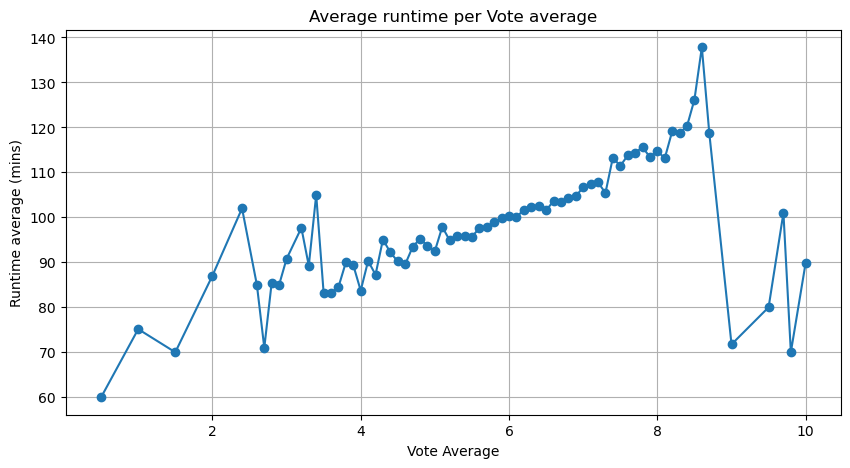

In [230]:
#Grouping runtime to vote_average, whilst taking the average of the runtime column to have a clean plot

#Since the graph is still cluttered, I am rounding the voting average
movies_cleaned.loc[:,'rounded_averages'] = movies_cleaned['vote_average'].round(1)

movies_cleaned.groupby('rounded_averages')['runtime'].mean().sort_index().plot(kind='line', marker= 'o', figsize = (10,5))
plt.title('Average runtime per Vote average')
plt.xlabel('Vote Average')
plt.ylabel('Runtime average (mins)')
plt.grid(True)
plt.show()

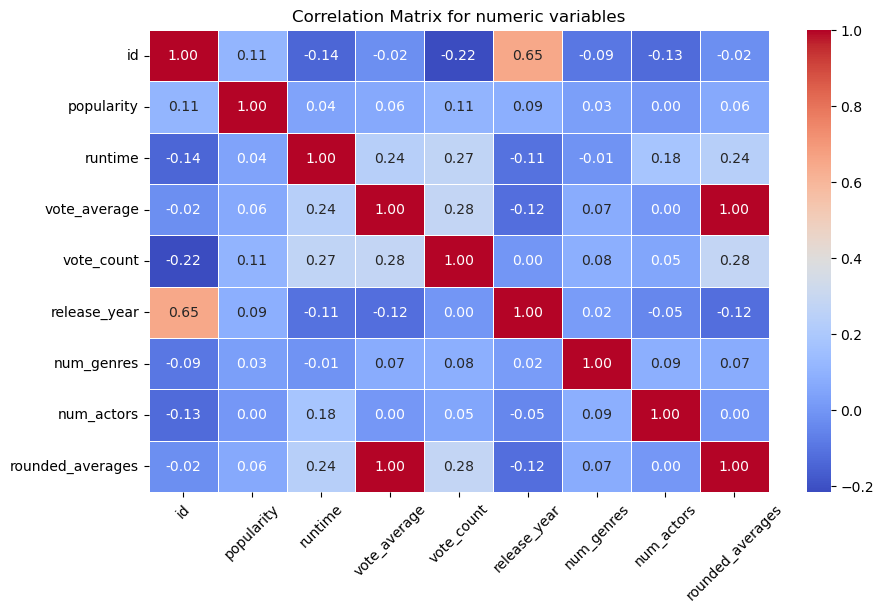

In [232]:
#Creating a correlation matrix 
corr_matrix = movies_cleaned.drop(columns=['adult']).corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, fmt ='.2f',cmap='coolwarm',linewidth=0.5)

plt.title('Correlation Matrix for numeric variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

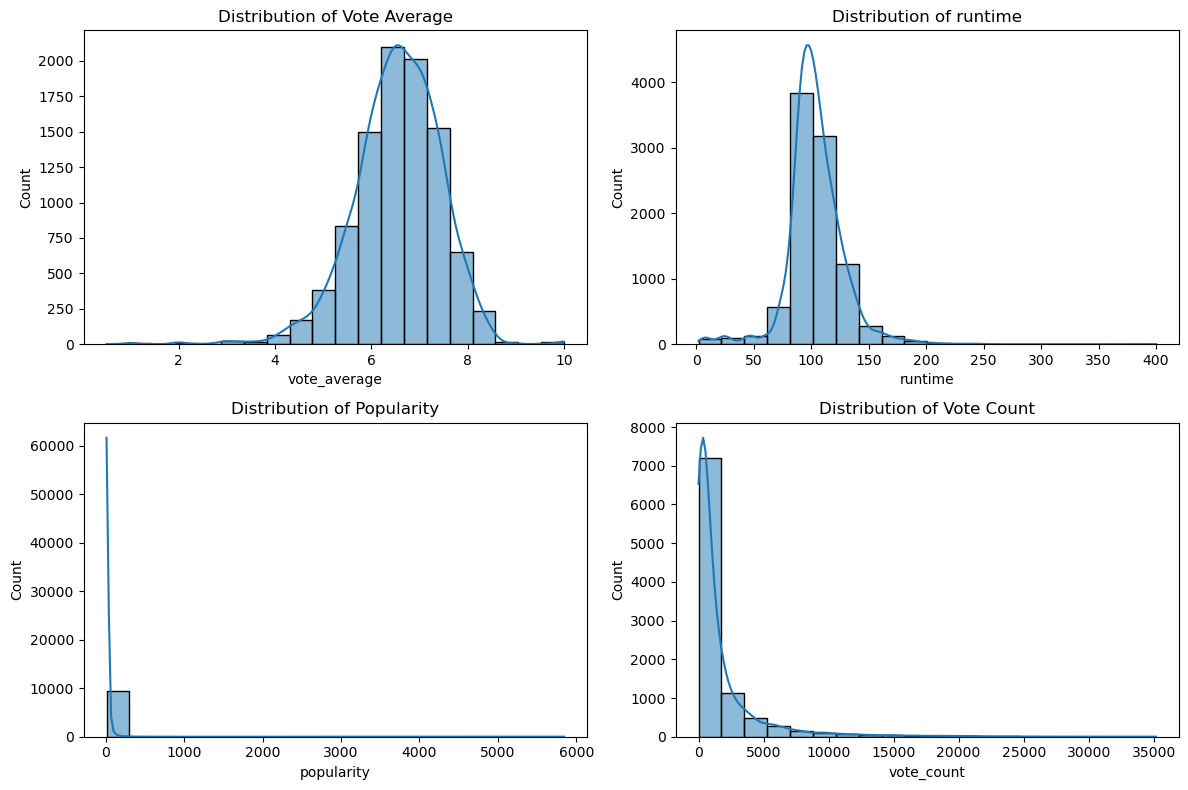

In [234]:
#Checking Distributions for key features like, 'vote_average','runtime','popularity','vote_count'

#Creating 2x2 subplots
fig, axs= plt.subplots(2,2,figsize=(12,8))
#Distribution of vote_average
sns.histplot(movies_cleaned['vote_average'],bins=20, kde= True, ax=axs[0,0])
axs[0,0].set_title('Distribution of Vote Average')
#Distribution of runtime
sns.histplot(movies_cleaned['runtime'], bins=20, kde= True, ax= axs[0,1])
axs[0,1].set_title('Distribution of runtime')
#Distribution of popularity
sns.histplot(movies_cleaned['popularity'], bins=20, kde= True, ax= axs[1,0])
axs[1,0].set_title('Distribution of Popularity')
#Distribution of vote_count
sns.histplot(movies_cleaned['vote_count'], bins=20, kde= True, ax= axs[1,1])
axs[1,1].set_title('Distribution of Vote Count')
plt.tight_layout()
plt.show()

C:\Users\anshu\AppData\Local\Temp\ipykernel_9612\759083204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned.loc[:,'log_vote_count'] = np.log1p(movies_cleaned['vote_count'])
C:\Users\anshu\AppData\Local\Temp\ipykernel_9612\759083204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned.loc[:,'log_popularity'] = np.log1p(movies_cleaned['popularity'])
C:\Users\anshu\AppData\Local\Temp\ipykernel_9612\759083204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

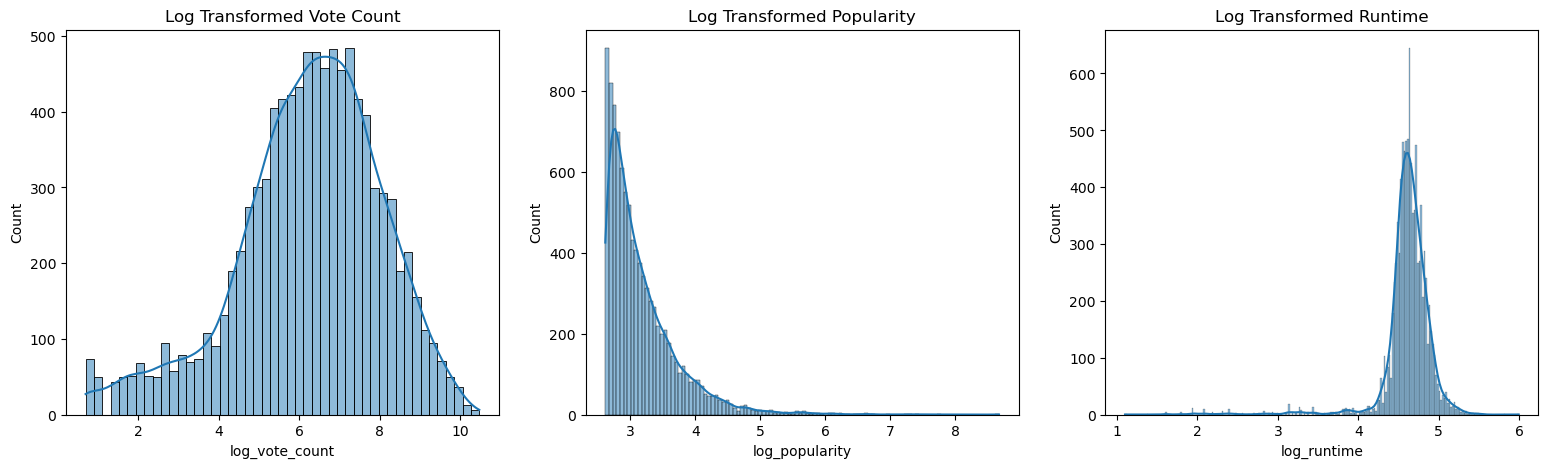

In [235]:
#Vote_average looks normally distributed, since others are highly skewed, instead of dropping outliers, we log transform to scale huge numbers.
movies_cleaned.loc[:,'log_vote_count'] = np.log1p(movies_cleaned['vote_count'])
movies_cleaned.loc[:,'log_popularity'] = np.log1p(movies_cleaned['popularity'])
movies_cleaned.loc[:,'log_runtime'] = np.log1p(movies_cleaned['runtime'])

#Plotting the transformed columns
fig, axs = plt.subplots(1, 3, figsize=(19,5))
sns.histplot(movies_cleaned['log_vote_count'], kde=True, ax=axs[0])
axs[0].set_title('Log Transformed Vote Count')

sns.histplot(movies_cleaned['log_popularity'], kde =True, ax=axs[1])
axs[1].set_title('Log Transformed Popularity')

sns.histplot(movies_cleaned['log_runtime'], kde=True, ax=axs[2])
axs[2].set_title('Log Transformed Runtime')
plt.show()

In [237]:
#Taking a look at the categorical data
movies_cleaned.select_dtypes(include='object').columns

Index(['title', 'genres', 'original_language', 'actors', 'director',
       'keywords', 'main_genre', 'main_actor'],
      dtype='object')

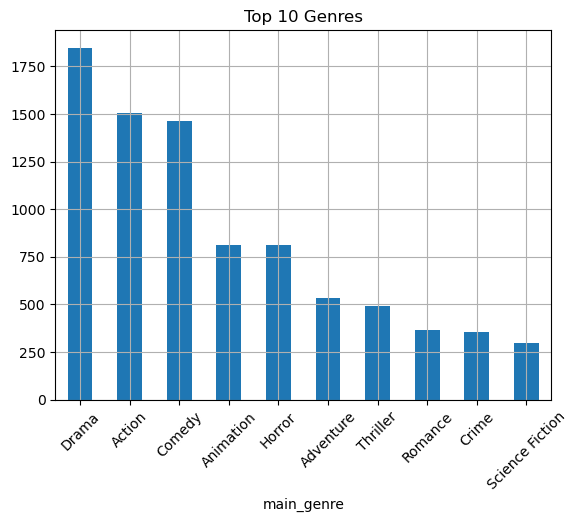

In [240]:
#Plotting Top 10 'main_genre' 
movies_cleaned['main_genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

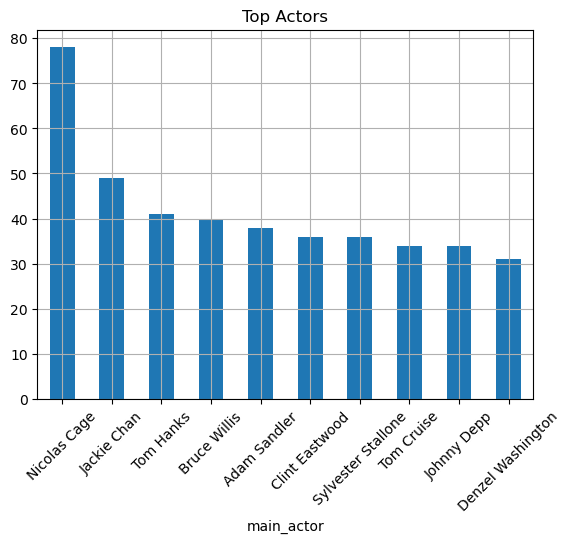

In [242]:
#Doing the same for 'main_actors', 'director', and 'original_language'
movies_cleaned['main_actor'].value_counts().head(10).plot(kind='bar')
plt.title('Top Actors')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [258]:
#Converting 'director' columns from a string to list 
#Importing ast to convert stringified lists into actual lists
#Reassigning director column with original data, (Replaced all director names with 'Unknown' accidently)
movies_cleaned.loc[:,'director']= movies_revs['director']

In [262]:
movies_cleaned.loc[:,'director']=movies_cleaned['director'].apply(
        lambda x: ast.literal_eval(x) if isinstance (x, str) and x.strip().startswith('[') else x)

In [264]:
movies_cleaned.loc[:,'director'] = movies_cleaned['director'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

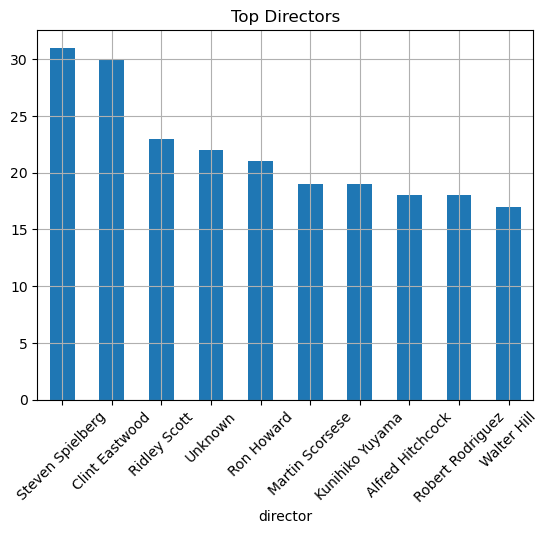

In [266]:
movies_cleaned['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top Directors')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

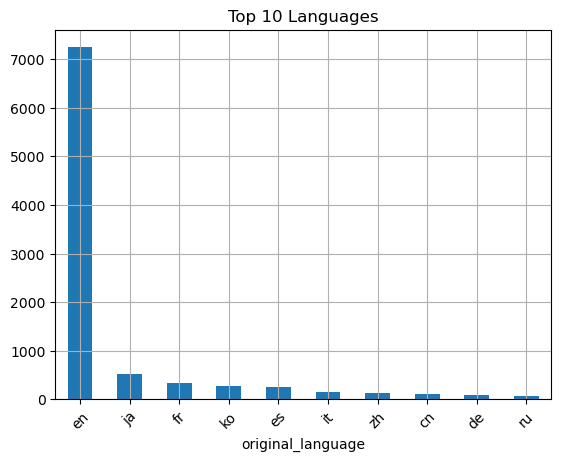

In [270]:
movies_cleaned['original_language'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Languages')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [272]:
movies_cleaned.to_csv('movies_cleaned.csv', index=False)